In this notebook we explore the [emotion dataset](https://huggingface.co/datasets/dair-ai/emotion) (doi:10.18653/v1/D18-1404) for which we want to create a classifier model. This dataset contains tweets in english language and labels them with one of the six emotions anger, fear, joy, love, sadness, and surprise. In its split variant, we have a training split of 16 000 tweets, a validation split of 2 000 tweets and a test split of 2 000 tweets.

# Load Dataset

In [21]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

# allow for completely displaying tweets
pd.options.display.max_colwidth = 280

In [22]:
emotion = load_dataset('emotion')
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

# Explore Entries

Here we just look into the dataset to get a feeling for it.

In [23]:
train_ds = emotion['train']
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [24]:
label_names = train_ds.features['label'].names

def label_int2str(row):
    return emotion['train'].features['label'].int2str(row)

In [25]:
train_ds.set_format('pandas')
df = train_ds[:]
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,2,love
4,i am feeling grouchy,3,anger


In [26]:
df.sample(5)

,text,label,label_name
5225,i feel which usually very few people may easily subdue the longing of ones or even,2,love
11610,i will probably do but for some reason i feel a bit agitated by it all,4,fear
2427,ive talked with her telling her that sometimes i feel shes not sincere,1,joy
6359,i have to care about and care for people with disabilities who are targeted by sensationalist media reports as well as at the same time feel the sorrow i do for the parents family members and community in newtown connecticut that is stunned by the events of today,5,surprise
8222,i always jumble words and letters and i feel like the inhalers i took back in college are the culprit for my brain being permanently damaged,0,sadness


# Analyze Contents

TODO what am I doing here

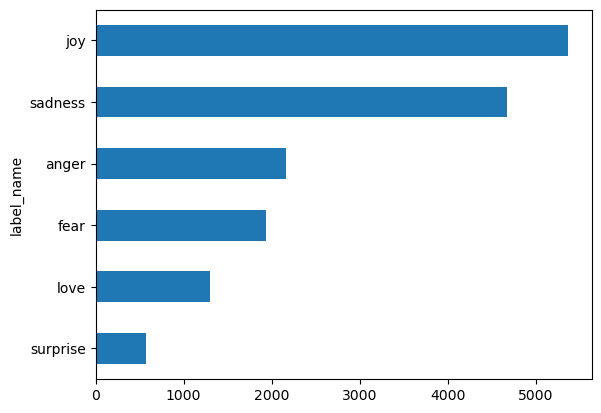

In [29]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.show()

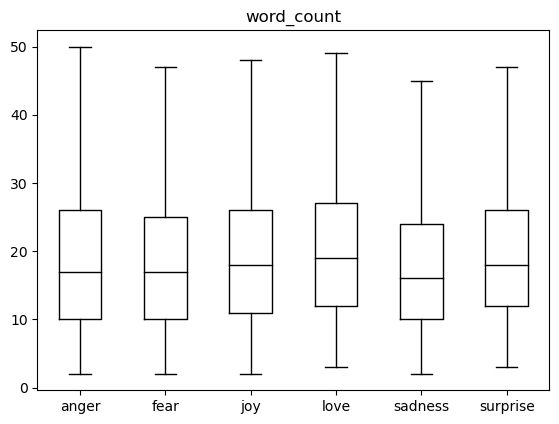

In [33]:
df['word_count'] = df['text'].str.split().apply(len)
df.boxplot('word_count', by='label_name', showfliers=False, grid=False, color='k')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [35]:
train_ds.reset_format()